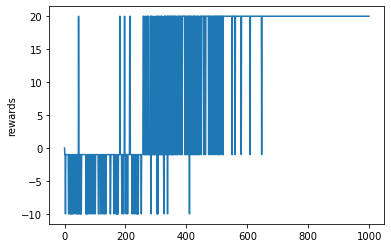

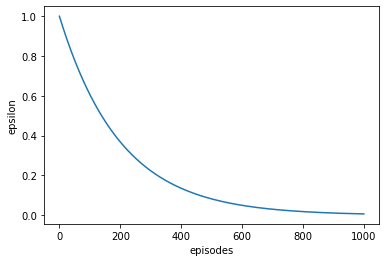

In [969]:
import numpy as np
import gym
import gym.wrappers
import time
import matplotlib.pyplot as plt

def get_action(env, qtable, state, epsilon):
    policy = np.random.uniform(0,1)
    if policy > epsilon:
        return np.argmax(qtable[state,:])   
    else:
         return env.action_space.sample()

def Q_learning(env):
    # Source: https://www.gymlibrary.dev/environments/toy_text/taxi/
    
    qtable = np.zeros((500, 6))

    episodes = 1000
    max_timesteps = 50
    epsilon = 1
    epsilon_decay_rate= 0.005
    learning_rate = .9
    discount_factor = 1
    reward_data = []
    reward = 0
    epsilon_data = []
    for each in range(episodes):
        state = env.reset()
        done = False
        step = 0
        reward_data.append(reward)
        while step < max_timesteps:
            action = get_action(env, qtable, state, epsilon)

            state2, reward, done, info = env.step(action)

            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_factor * np.max(qtable[state2,:])-qtable[state,action])

            state = state2
            step += 1

            if done == True:
                break
        epsilon = np.exp(-epsilon_decay_rate*each)
        epsilon_data.append(epsilon)
        
    env.close()
    plt.plot(reward_data)
    plt.ylabel('rewards')
    plt.show()
    plt.plot(epsilon_data)
    plt.ylabel('epsilon')
    plt.xlabel('episodes')
    plt.show()

if __name__ == "__main__":
    env = gym.make('Taxi-v3')
    Q_learning(env)

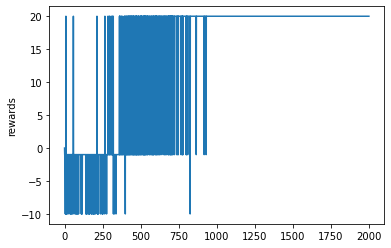

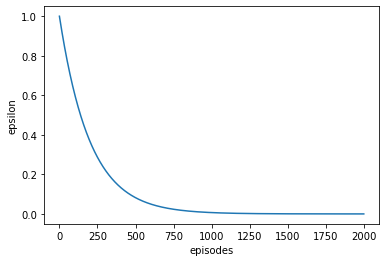

In [970]:
import numpy as np
import gym
import gym.wrappers
import time
import matplotlib.pyplot as plt

def SARSA_get_action(env, qtable, state, epsilon):
    policy = np.random.uniform(0,1)
    if policy > epsilon:
        return np.argmax(qtable[state,:])   
    else:
         return env.action_space.sample()

def SARSA(env):
    # Source: https://www.gymlibrary.dev/environments/toy_text/taxi/
    qtable = np.zeros((500, 6))

    episodes = 2000
    max_timesteps = 50
    epsilon = .4
    epsilon_decay_rate= 0.005
    learning_rate = .5
    discount_factor = .95
    reward_data = []
    reward = 0
    epsilon_data = []
    
    for each in range(episodes):
        state = env.reset()
        done = False
        step = 0
        reward_data.append(reward)
        
        action = SARSA_get_action(env, qtable, state, epsilon)
        while step < max_timesteps:
            

            state2, reward, done, info = env.step(action)
            action2 = get_action(env, qtable, state2, epsilon)
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_factor * qtable[state2,action2]-qtable[state,action])

            state = state2
            action = action2
            step += 1

            if done == True:
                break
        epsilon = np.exp(-epsilon_decay_rate*each)
        epsilon_data.append(epsilon)

    env.close()
    plt.plot(reward_data)
    plt.ylabel('rewards')
    plt.show()
    plt.plot(epsilon_data)
    plt.ylabel('epsilon')
    plt.xlabel('episodes')
    plt.show()

if __name__ == "__main__":
    env = gym.make('Taxi-v3')
    SARSA(env)

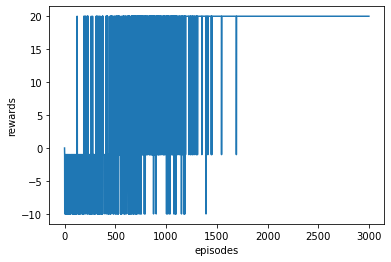

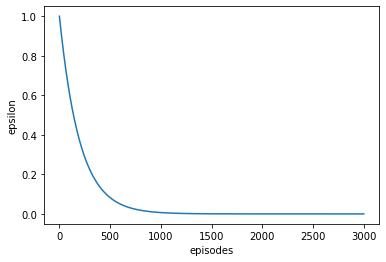

In [971]:
import numpy as np
import gym
import gym.wrappers
import time
import matplotlib.pyplot as plt

def Double_Q_get_action(env, qtableA, qtableB, state, epsilon):
    policy = np.random.uniform(0,1)
    if policy > epsilon:
        tableSums = []
        x=0
        for x in range(6):
            tableSums.append(qtableA[state,x]+qtableB[state,x])
        
        maxVal = max(tableSums)
        maxList = []
        for x in range(6):
            if tableSums[x] == maxVal:
                maxList.append(x)
        action = np.random.choice(maxList)
        return action
    else:
         return env.action_space.sample()
        
def get_table(qtable, state):
        return np.argmax(qtable[state])

def Double_Q_learning(env):
    # Source: https://www.gymlibrary.dev/environments/toy_text/taxi/
    qtableA = np.zeros((500, 6))
    qtableB = np.zeros((500, 6))
    episodes = 3000
    max_timesteps = 50
    epsilon = 1
    epsilon_decay_rate= 0.005
    learning_rate = 1
    discount_factor = 1
    reward_data = []
    reward = 0
    epsilon_data = []

    for each in range(episodes):
        state = env.reset()
        done = False
        step = 0
        reward_data.append(reward)
        while step < max_timesteps:
            action = Double_Q_get_action(env, qtableA, qtableB, state, epsilon)
            state2, reward, done, info = env.step(action)
            randomUpdate = np.random.uniform(0,1)
            if randomUpdate > .5:
                action2 = get_table(qtableA, state2)
                qtableA[state,action] = qtableA[state,action] + learning_rate * (reward + discount_factor * qtableB[state2,action2]-qtableA[state,action])
            else:
                action2 = get_table(qtableB, state2)
                qtableB[state,action] = qtableB[state,action] + learning_rate * (reward + discount_factor * qtableA[state2,action2]-qtableB[state,action])

            state = state2
            step += 1

            if done == True:
                break
        epsilon = np.exp(-epsilon_decay_rate*each)
        epsilon_data.append(epsilon)

    env.close()
    plt.plot(reward_data)
    plt.ylabel('rewards')
    plt.xlabel('episodes')
    plt.show()
    plt.plot(epsilon_data)
    plt.ylabel('epsilon')
    plt.xlabel('episodes')
    plt.show()
    
if __name__ == "__main__":
    env = gym.make('Taxi-v3')
    Double_Q_learning(env)

Q-LEARNING


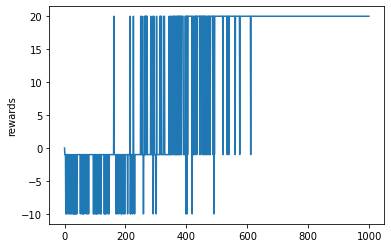

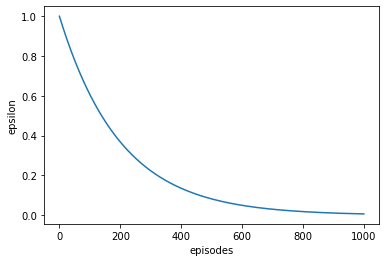

SARSA


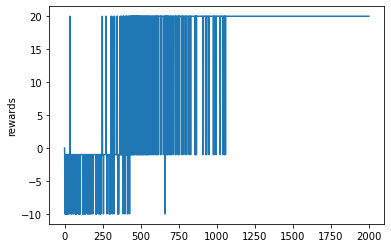

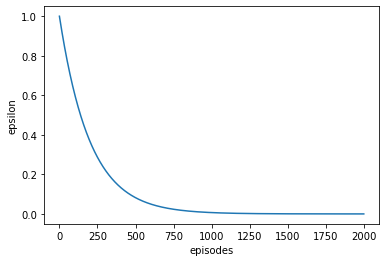

DOUBLE Q-LEARNING


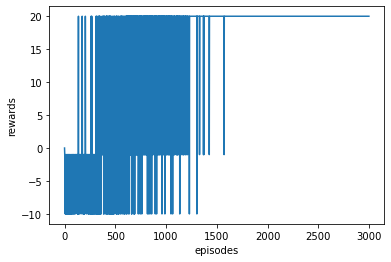

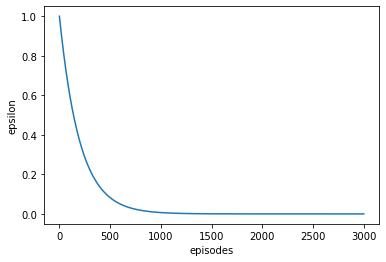

In [972]:
if __name__ == "__main__":
    env = gym.make('Taxi-v3')
    print("Q-LEARNING")
    Q_learning(env)
    print("SARSA")
    SARSA(env)
    print("DOUBLE Q-LEARNING")
    Double_Q_learning(env)